In [2]:
from fastai import* 
from fastai.vision import*
import numpy as np
from exp.nb_new_data_augmentation import *

In [3]:
path =Path('.')

In [4]:
tfms = get_transforms(flip_vert=True)

In [5]:
test = ImageList.from_csv(path, 'test.csv', folder='train', suffix='.jpg')

In [7]:
np.random.seed(42)
src = (ImageList.from_csv(path, 'train.csv', folder='train', suffix='.jpg')
       .split_by_rand_pct(0.2)
       .label_from_df())

In [8]:
# data = (src.add_test(test).transform(tfms, size=128, resize_method=ResizeMethod.SQUISH)
#         .databunch(bs=64).normalize(imagenet_stats))
data = (src.add_test(test).transform(tfms, size=128,)
        .databunch(bs=64).normalize(imagenet_stats))

NameError: name 'size' is not defined

In [7]:
learn = cnn_learner(data,models.resnet34, metrics= accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


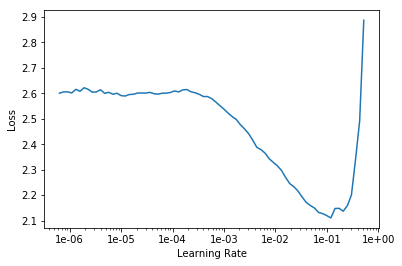

In [8]:
learn.lr_find()
learn.recorder.plot()

In [9]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,1.261013,0.998456,0.642274,02:50
1,1.042537,0.906612,0.674388,02:40
2,0.938592,0.857225,0.684654,02:42
3,0.900934,0.831377,0.690971,02:38
4,0.873872,0.823088,0.698605,02:54


In [10]:
interp = ClassificationInterpretation.from_learner_learner(learn)

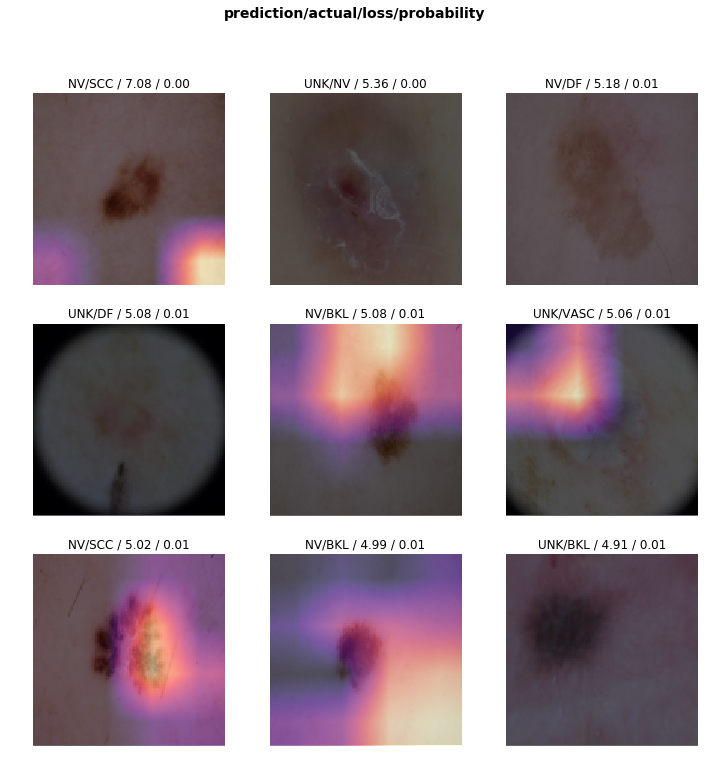

In [15]:
interp.plot_top_losses(9)

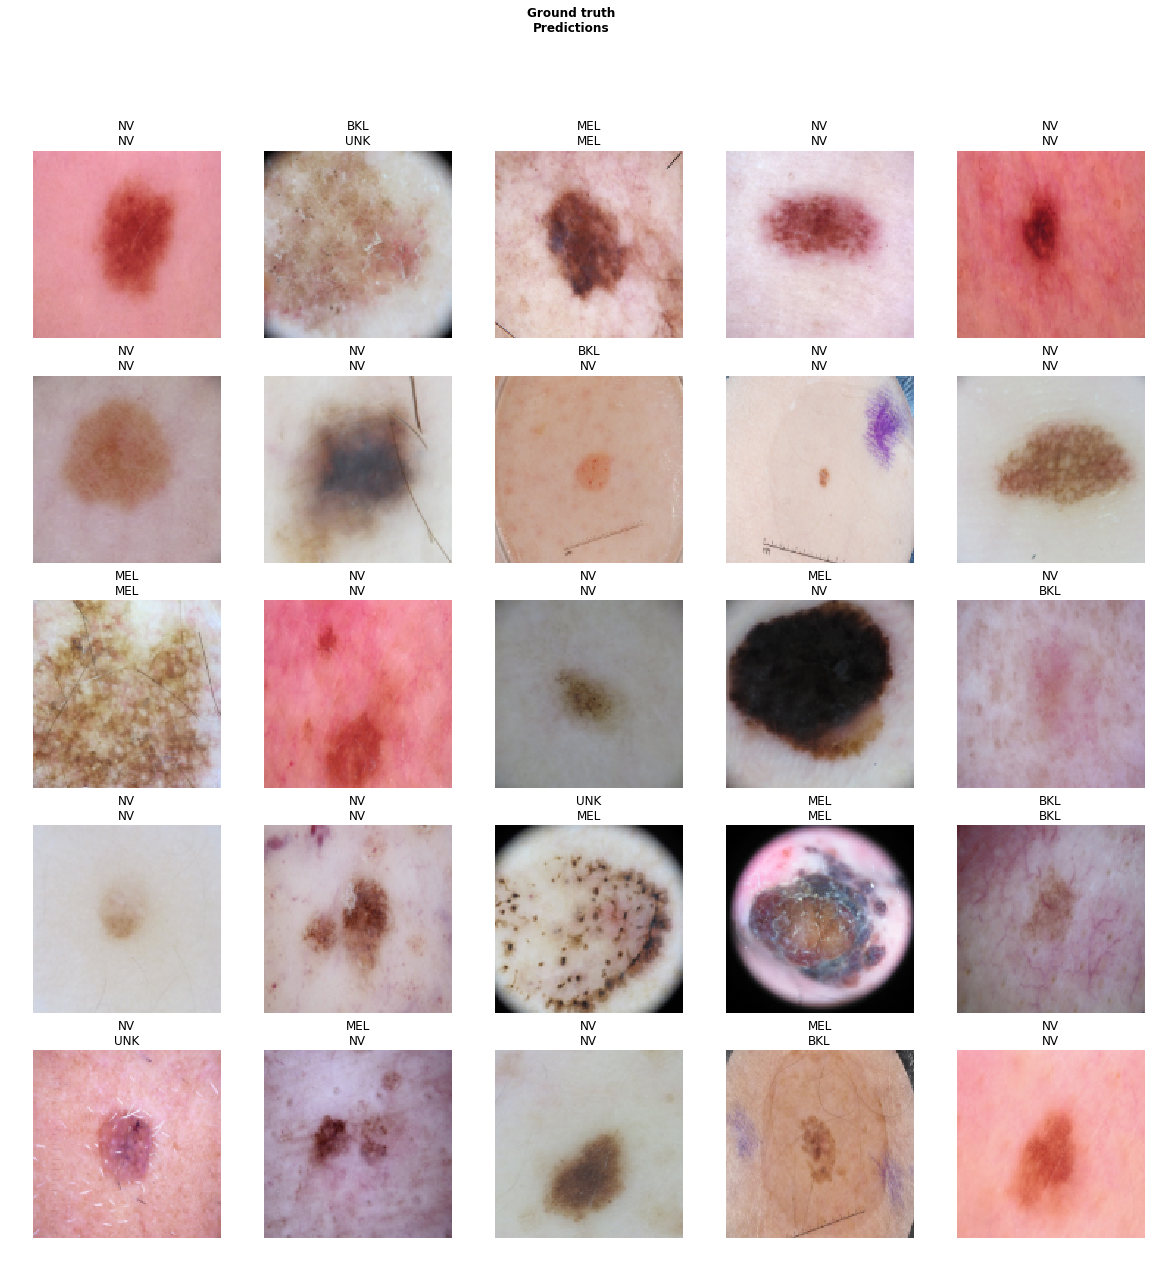

In [16]:
learn.show_results()

In [24]:
learn.save('stage-1')

In [25]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (15199 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
MEL,MEL,AK,SCC,NV
Path: .;

Valid: LabelList (3799 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
NV,BKL,MEL,NV,NV
Path: .;

Test: LabelList (6333 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: EmptyLabelList
,,,,
Path: ., model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


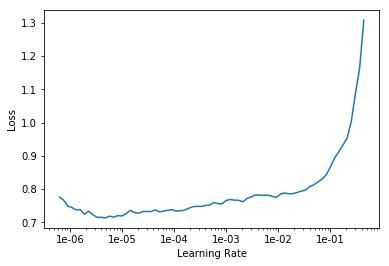

In [26]:
learn.lr_find()
learn.recorder.plot()

In [28]:
lr = 1e-2

In [29]:
learn.fit_one_cycle(10, max_lr=slice(1e-6,lr/5))

epoch,train_loss,valid_loss,accuracy,time
0,0.776525,0.761507,0.720716,02:24
1,0.793151,0.765931,0.717294,02:31
2,0.800202,0.765729,0.712556,02:30
3,0.793174,0.765884,0.715188,02:38
4,0.787315,0.760446,0.716768,02:32
5,0.770307,0.751826,0.720190,02:33
6,0.769118,0.743120,0.723875,02:26
7,0.755701,0.741115,0.722032,02:25
8,0.745893,0.737352,0.723348,02:26
9,0.745978,0.739255,0.727297,02:29


In [30]:
learn.save('stage-2')

In [31]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (15199 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
MEL,MEL,AK,SCC,NV
Path: .;

Valid: LabelList (3799 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
NV,BKL,MEL,NV,NV
Path: .;

Test: LabelList (6333 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: EmptyLabelList
,,,,
Path: ., model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=

In [32]:
learn.freeze()

In [33]:
learn.data = data = (src.add_test(test).transform(tfms, size=224,)
        .databunch(bs=32).normalize(imagenet_stats))

In [34]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,time
0,0.818125,0.748102,0.725454,03:16
1,0.868132,0.727447,0.739142,03:15
2,0.831560,0.727659,0.736246,03:15
3,0.812260,0.721913,0.736246,03:19
4,0.785931,0.704279,0.741511,03:21
5,0.757812,0.671256,0.763096,03:33
6,0.750213,0.659656,0.764938,03:27
7,0.699957,0.651635,0.764675,03:11
8,0.673793,0.650586,0.769150,03:12
9,0.674172,0.646197,0.770466,03:15


In [35]:
learn.save('stage-3')

In [36]:
learn.load('stage-3')

Learner(data=ImageDataBunch;

Train: LabelList (15199 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
MEL,MEL,AK,SCC,NV
Path: .;

Valid: LabelList (3799 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
NV,BKL,MEL,NV,NV
Path: .;

Test: LabelList (6333 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: ., model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=

In [37]:
learn.fit_one_cycle(10, max_lr=(1e-5))

epoch,train_loss,valid_loss,accuracy,time
0,0.684586,0.646240,0.768623,03:16
1,0.680485,0.650095,0.767834,03:15
2,0.675003,0.650413,0.765991,03:15
3,0.649867,0.648908,0.768360,03:15
4,0.657710,0.647806,0.772309,03:16
5,0.687873,0.644078,0.768887,03:16
6,0.652455,0.646120,0.766254,09:59
7,0.664298,0.648684,0.768887,03:37
8,0.665792,0.647452,0.768360,03:17
9,0.682237,0.647868,0.768623,03:40


In [38]:
learn.save('stage-4')